In [222]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import os

face_cascade = cv.CascadeClassifier('/home/MLteam2/0604/haarcascade_frontalface_alt2.xml')

In [223]:
directory = "/home/MLteam2/son_faces"
png_files = [f for f in os.listdir(directory) if f.endswith('.png')]
print(len(png_files))

140


In [224]:
son_img_list=[]
for i in png_files:
    img = cv.imread('/home/MLteam2/son_faces/{}'.format(i))
    faces = face_cascade.detectMultiScale(img)
    if len(faces) == 1:
        for x, y, x_s, y_s in faces:
            img_g = img[y:(y+y_s), x:(x+x_s)]
            son_img_list.append(img_g)

re_son_img_list = []
for i in son_img_list:
  re_son_img_list.append(cv.resize(i,(50,50)))

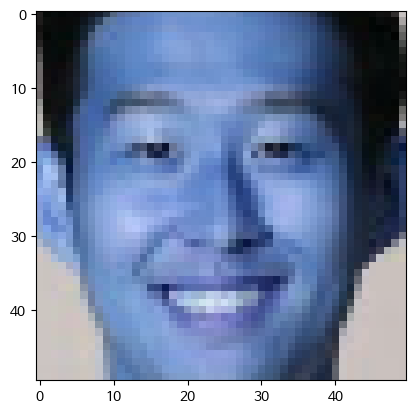

In [225]:
plt.imshow(re_son_img_list[0])

In [226]:
son_one = [[1] for i in range(len(re_son_img_list))]
print(len(son_one))

103


In [227]:
directory = "/home/MLteam2/ai_faces2"
png_files = [f for f in os.listdir(directory) if f.endswith('.png')]
print(len(png_files))

1500


In [228]:
ai_img_list=[]
for i in png_files:
    img = cv.imread('/home/MLteam2/ai_faces2/{}'.format(i))
    faces = face_cascade.detectMultiScale(img)
    if len(faces) == 1:
        for x,y,x_s,y_s in faces:
            img_g = img[y:(y+y_s), x:(x+x_s)]
            ai_img_list.append(img_g)
    
re_ai_img_list=[]
for i in ai_img_list:
  re_ai_img_list.append(cv.resize(i,(50,50)))

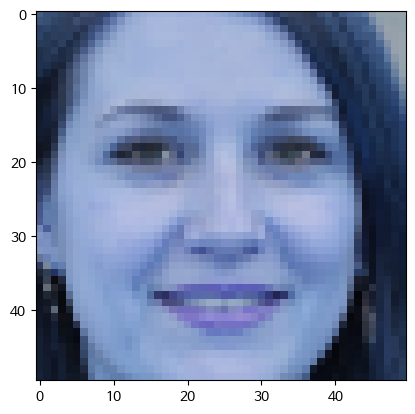

In [229]:
plt.imshow(re_ai_img_list[0])

In [230]:
ai_zero = [[0] for i in range(len(re_ai_img_list))]
print(len(ai_zero))

1499


In [231]:
train_images = np.array(re_son_img_list[1::2] + re_ai_img_list[1:300:2])
train_labels = np.append(son_one[1::2], ai_zero[1:300:2], axis=0)

test_images = np.array(re_son_img_list[0::2] + re_ai_img_list[0:300:2])
test_labels = np.append(son_one[0::2], ai_zero[0:300:2], axis=0)

In [232]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

In [268]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(50, 50, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(16, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(16, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(2))

In [269]:
# 모델 컴파일 및 학습 과정
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=100, 
                    validation_data=(test_images, test_labels))

# history 객체에서 accuracy와 loss 값 추출
train_accuracy = history.history['accuracy']
train_loss = history.history['loss']
val_accuracy = history.history['val_accuracy']
val_loss = history.history['val_loss']

# 결과 출력
print("Training Accuracy: ", train_accuracy)
print("Training Loss: ", train_loss)
print("Validation Accuracy: ", val_accuracy)
print("Validation Loss: ", val_loss)


Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 583ms/step - accuracy: 0.5874 - loss: 17.1551 - val_accuracy: 0.7426 - val_loss: 2.5885
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.6880 - loss: 1.1119 - val_accuracy: 0.5792 - val_loss: 0.6365
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6541 - loss: 0.5503 - val_accuracy: 0.8020 - val_loss: 0.5299
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8452 - loss: 0.4317 - val_accuracy: 0.8366 - val_loss: 0.4147
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8566 - loss: 0.4107 - val_accuracy: 0.8416 - val_loss: 0.4134
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8722 - loss: 0.2939 - val_accuracy: 0.8663 - val_loss: 0.3649
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9188 - loss: 0.3039 - val_accuracy: 0.8861 - val_loss: 0.3587
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9213 - loss: 0.2249 - val_accuracy: 0.9109 - val_loss:

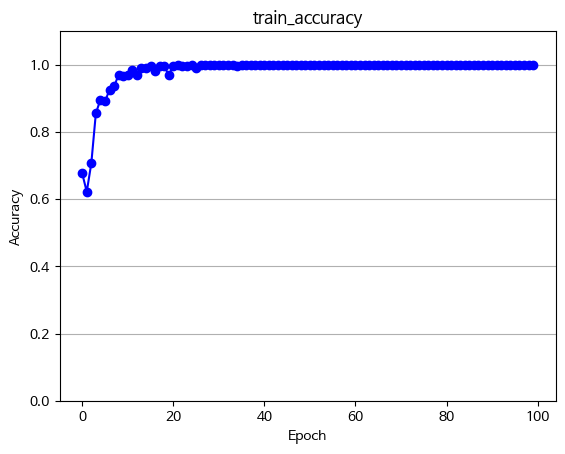

In [282]:
plt.plot(train_accuracy[:],'bo-')
# plt.plot(train_loss, label = 'Loss')
plt.grid(True, axis='y')
plt.ylim([0, 1.1]) 
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("train_accuracy")
plt.show()

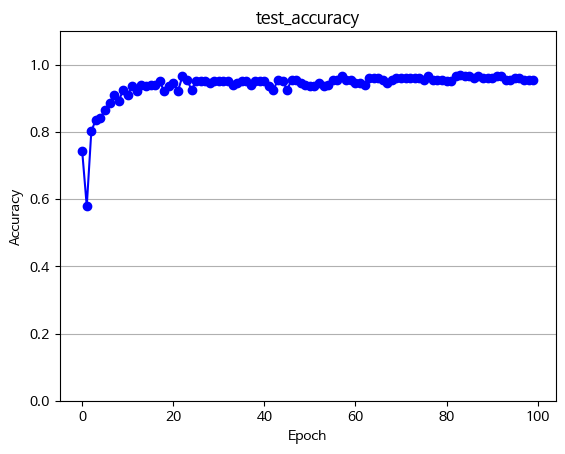

In [279]:
plt.plot(val_accuracy[:],'bo-')
# plt.plot(train_loss, label = 'Loss')
plt.grid(True, axis='y')
plt.ylim([0, 1.1]) 
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("test_accuracy")
plt.show()

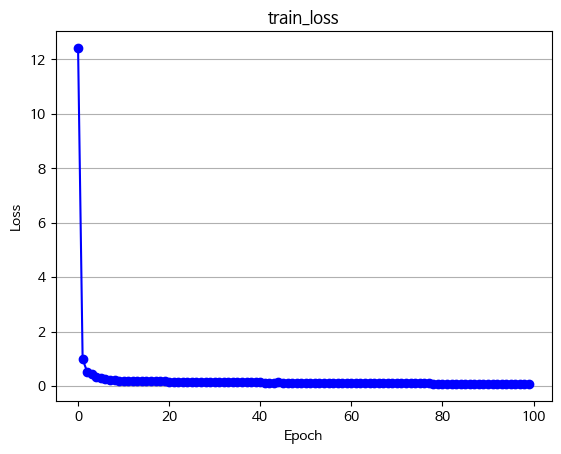

In [283]:
plt.plot(train_loss[:],'bo-')
# plt.plot(train_loss, label = 'Loss')
plt.grid(True, axis='y')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("train_loss")
plt.show()

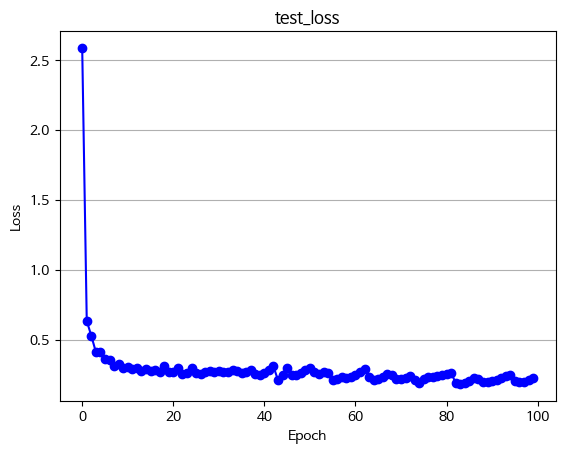

In [281]:
plt.plot(val_loss[:],'bo-')
# plt.plot(train_loss, label = 'Loss')
plt.grid(True, axis='y')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("test_loss")
plt.show()

In [272]:
results = model.evaluate(test_images, test_labels)
print(results)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9144 - loss: 0.4254 
[0.2299748659133911, 0.9554455280303955]


In [273]:
directory = "/home/MLteam2/tottenham_w.son"
png_files = [f for f in os.listdir(directory) if f.endswith('.png')]

ex_img_list = []
for i in png_files:
  img = cv.imread('/home/MLteam2/tottenham_w.son/{}'.format(i))
  faces = face_cascade.detectMultiScale(img)
  for x, y, x_s, y_s in faces:
    img_g = img[y:(y+y_s), x:(x+x_s)]
    ex_img_list.append(img_g)
    
re_ex_img_list = []
for i in ex_img_list:
  re_ex_img_list.append(cv.resize(i,(50,50)))

show_ex_img_list = []
for i in ex_img_list:
  show_ex_img_list.append(cv.resize(i,(100,100)))

re_ex_img_list = np.array(re_ex_img_list)
show_ex_img_list = np.array(show_ex_img_list)

pred = model.predict(re_ex_img_list)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


In [274]:
pred_sons = show_ex_img_list[pred.argmax(axis=1)>0]

pred_sons2 = show_ex_img_list[pred[:,1]>1]

In [275]:
print(len(show_ex_img_list))
print(len(pred_sons)) #정답 6개 제외하면 2개 오답

33
8


In [287]:
print('실전에서 모델의 정확도:'+str((33-2)/33 *100)+'%')

실전에서 모델의 정확도:93.93939393939394%


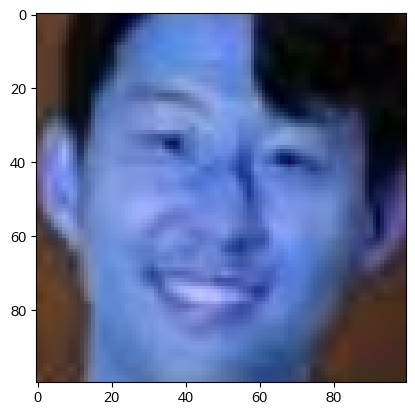

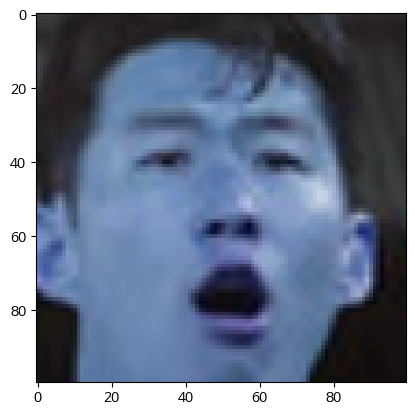

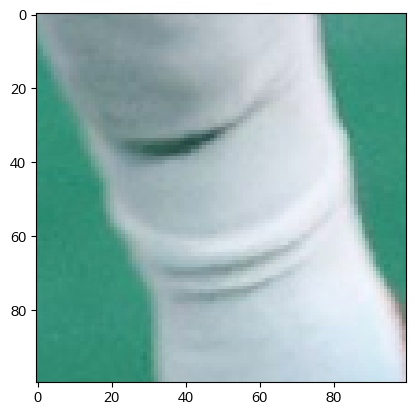

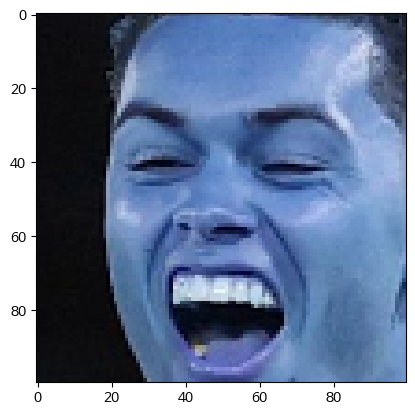

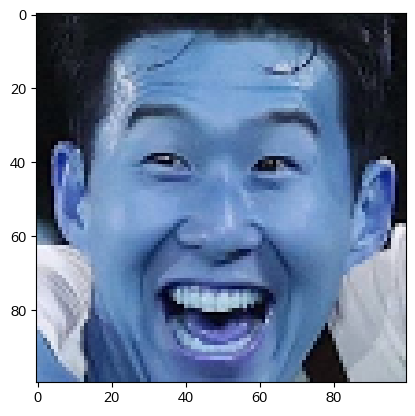

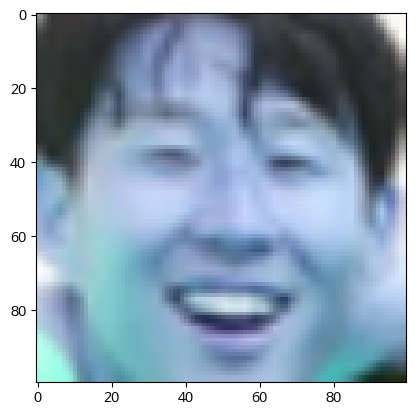

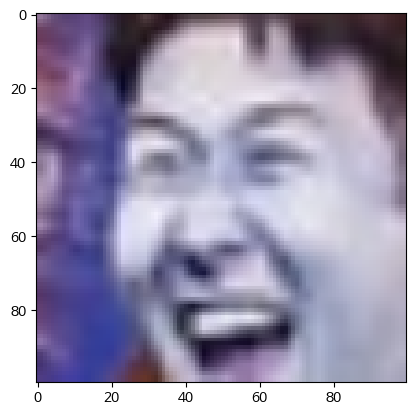

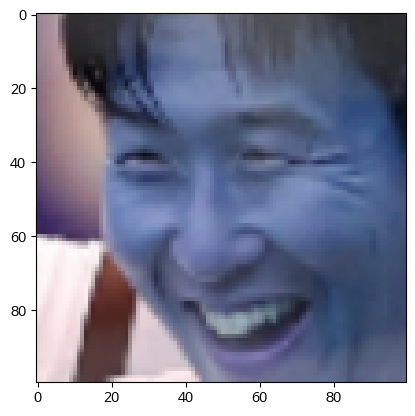

In [276]:
for i in pred_sons:
    plt.imshow(i)
    plt.show()

In [277]:
from matplotlib import pyplot as plt
import matplotlib.patches as patches

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
3
[array([False, False,  True])]
232 20 41 41
70 15 43 43
153 20 46 46
153 20 46 46


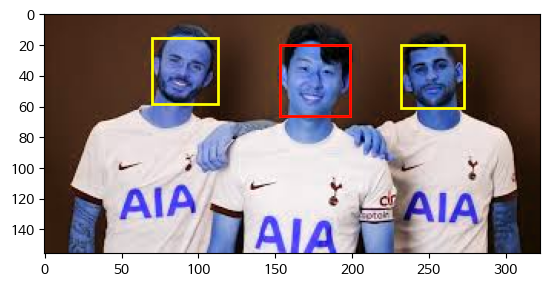

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
3
[array([False,  True, False])]
185 132 53 53
538 140 53 53
361 121 51 51
538 140 53 53


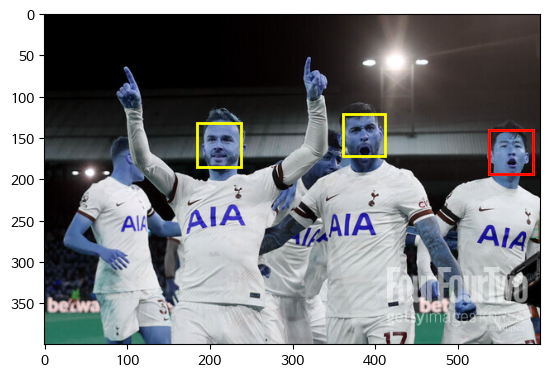

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
5
[array([ True, False, False,  True,  True])]
1583 2028 148 148
1610 2090 123 123
532 653 193 193
1384 320 222 222
990 448 256 256
1583 2028 148 148
1384 320 222 222
990 448 256 256


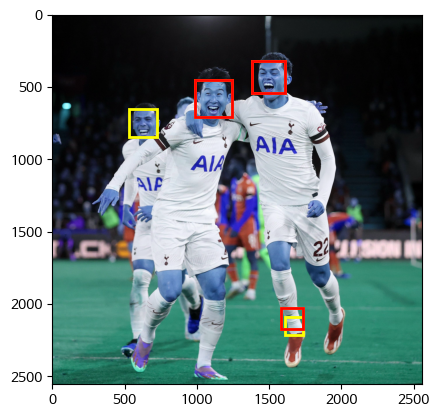

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
8
[array([False,  True, False, False, False, False, False, False])]
307 33 37 37
188 42 38 38
218 89 45 45
446 38 41 41
379 41 46 46
140 56 43 43
453 158 41 41
63 42 46 46
188 42 38 38


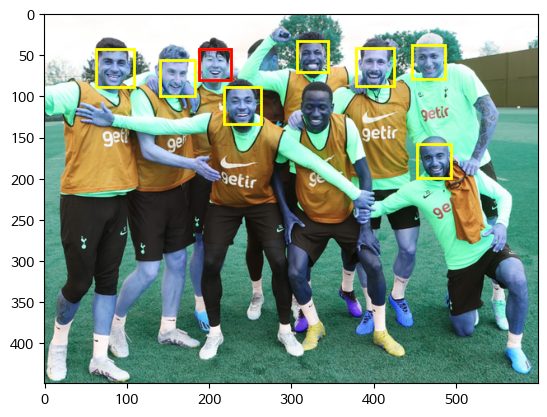

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
8
[array([False, False, False, False, False, False,  True, False])]
324 28 22 22
394 28 22 22
287 55 26 26
428 62 25 25
442 117 24 24
312 117 27 27
344 59 32 32
215 91 37 37
344 59 32 32


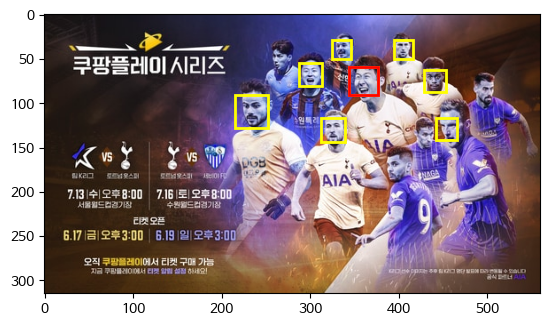

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
4
[array([False, False, False, False])]
336 105 67 67
684 110 65 65
457 53 66 66
854 59 77 77


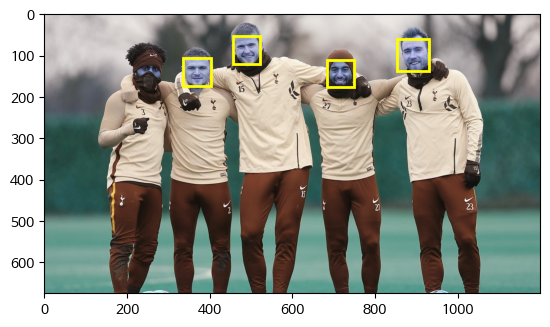

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
2
[array([False,  True])]
210 60 67 67
352 91 63 63
352 91 63 63


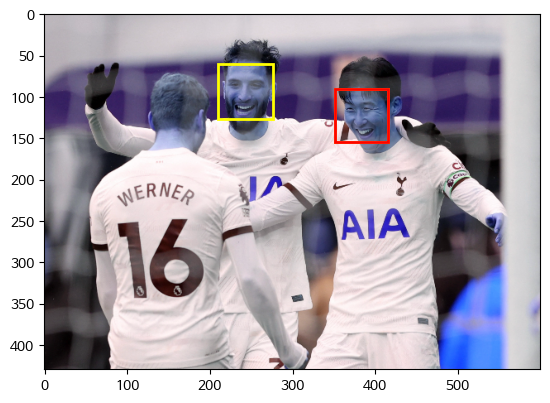

In [288]:
directory = "/home/MLteam2/tottenham_w.son"
png_files = [f for f in os.listdir(directory) if f.endswith('.png')]

for i in png_files:
  img = cv.imread('/home/MLteam2/tottenham_w.son/{}'.format(i))
  plt.imshow(img, zorder=1)
  faces = face_cascade.detectMultiScale(img)
  ex_img_list = []
  for x, y, x_s, y_s in faces:
    img_g = img[y:(y+y_s), x:(x+x_s)]
    ex_img_list.append(img_g)
    
  re_ex_img_list = []
  for i in ex_img_list:
    re_ex_img_list.append(cv.resize(i,(50,50)))

  show_ex_img_list = []
  for i in ex_img_list:
    show_ex_img_list.append(cv.resize(i,(100,100)))

  re_ex_img_list = np.array(re_ex_img_list)
  show_ex_img_list = np.array(show_ex_img_list)

  pred = model.predict(re_ex_img_list)
  faces = np.array(faces)
  print(len(faces))
  print([pred.argmax(axis=1)>0])

  for q in np.array(range(len(faces))):
      x, y, x_s, y_s = faces[q]
      print(x, y, x_s, y_s)
      ax = plt.gca()
      rect = patches.Rectangle((x, y), x_s, y_s, fill=None, alpha=1,color='yellow',linewidth=2, zorder=1)
      ax.add_patch(rect)    
    
  for q in np.array(range(len(faces)))[pred.argmax(axis=1)>0]:
      x, y, x_s, y_s = faces[q]
      print(x, y, x_s, y_s)
      ax = plt.gca()
      rect = patches.Rectangle((x, y), x_s, y_s, fill=None, alpha=1,color='red',linewidth=2, zorder=2)
      ax.add_patch(rect)

  plt.show()
#  pred_sons = show_ex_img_list[pred.argmax(axis=1)>0]